# PHYS3116 Tutorial 4: Curve Fitting and Star Formation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks

## Worked Example: Linear Curve Fitting

In [2]:
# Randomly Generate Data
gradient = 25
x = np.arange(0, 100, 1)
y = gradient * x + 1000 * np.random.rand(100)

df = pd.DataFrame({
    'x': x,
    'y': y,
})

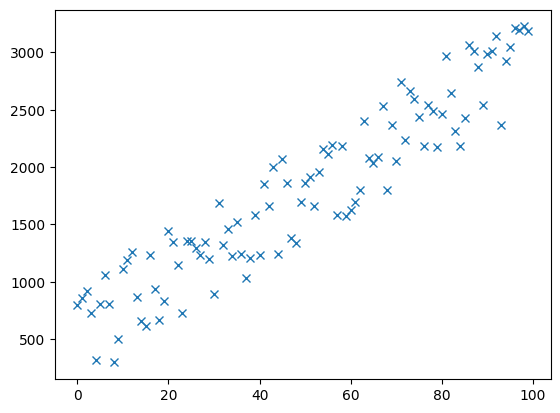

In [3]:
plt.plot(
    df['x'],
    df['y'],
    'x'
)

Linear Regression yields the following parameters:
- `slope`
- `intercept`
- `rvalue`
- `pvalue`
- `stderr`: standard error of slope
- `intercept_stderr`: standard error of intercept


High `rvalue` (magnitude between 0.7 and 0.1) indicates strong linear relationship.  
`pvalue < 5%` is considered strong evidence for a linear fit (i.e probability of getting such an extreme outcome is less than 5%)

In [4]:
# Fit a linear curve
result = stats.linregress(x, y)
print(result)
print(f'Line has equation y = ({result.slope:.2f} +- {result.stderr:.2f}) * x + ({result.intercept:.2f} +- {result.intercept_stderr:.2f})')
print(f'Result has R-value of {result.rvalue:.2f} and p-value of {result.pvalue:.2e}')

LinregressResult(slope=24.753870014686306, intercept=564.4350653330637, rvalue=0.9363839802341158, pvalue=2.3469176433165315e-46, stderr=0.9372492040959793, intercept_stderr=53.706096839601535)
Line has equation y = (24.75 +- 0.94) * x + (564.44 +- 53.71)
Result has R-value of 0.94 and p-value of 2.35e-46


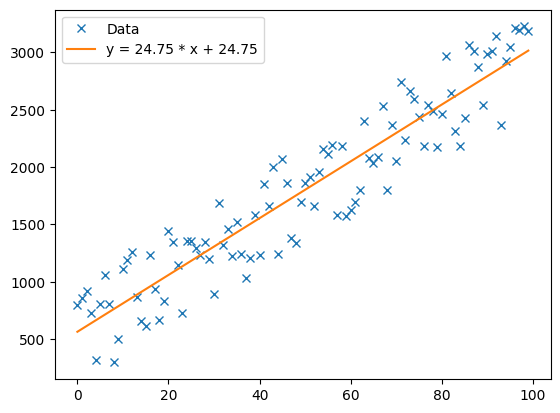

In [5]:
plt.plot(
    df['x'],
    df['y'],
    'x',
    label='Data'
)
# Adding LOB to graph
plt.plot(
    x, result.slope * x + result.intercept,
    label=f'y = {result.slope:.2f} * x + {result.slope:.2f}'
)
plt.legend()

## Worked Example: Star Formation Rate as a function of stellar mass and age.

In [6]:
data = pd.read_csv('PHYS3116_Week4_Tutorial_Data.csv')
data = data[(data['alpha_re'] > -99) & (data['z_re'] > -99)]

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/var/folders/nb/byfjq48d6jz8b3g74s3zr7rh0000gp/T/ipykernel_56337/2067835590.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Log of Stellar Mass ($\log M_\odot$)')


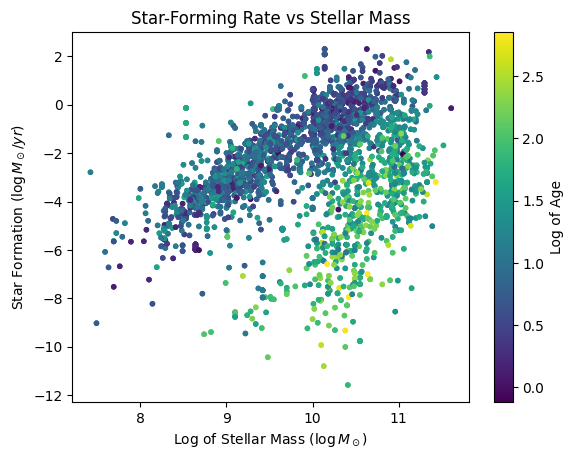

In [7]:
plt.scatter(
    data['mstar'],
    np.log(data['sfr_re']),
    c=np.log(data['age_re']),
    marker='.'
)
cbar = plt.colorbar()

plt.title(r'Star-Forming Rate vs Stellar Mass')
plt.xlabel('Log of Stellar Mass ($\log M_\odot$)')
plt.ylabel(r'Star Formation ($\log M_\odot / yr$)')
cbar.set_label(r'Log of Age')

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/var/folders/nb/byfjq48d6jz8b3g74s3zr7rh0000gp/T/ipykernel_56337/988674923.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Log of Stellar Mass ($\log M_\odot$)')


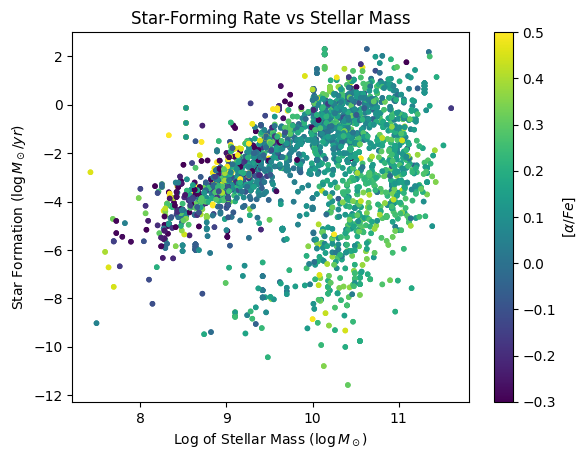

In [8]:
plt.scatter(
    data['mstar'],
    np.log(data['sfr_re']),
    c=data['alpha_re'],
    marker='.'
)
cbar = plt.colorbar()

plt.title(r'Star-Forming Rate vs Stellar Mass')
plt.xlabel('Log of Stellar Mass ($\log M_\odot$)')
plt.ylabel(r'Star Formation ($\log M_\odot / yr$)')
cbar.set_label(r'$[\alpha / Fe]$')

Students should note the following:
- More mass generally indicates greater star-formation rate
    -  Greater gravitational potential to retain gas (recall the Bathtub Model)
- The diagram can be separated into the following sections:
    - Star-burst Region 
    - Star-Forming Main Sequence
    - Galaxies in the middle (in the process of quenching)
    - Quiescent Galaxies
- Age 
    - Typically, star-forming galaxies are early on in their lifespan.
    - We can see that most of the quenching and quiescent galaxies tend to be much older (tho not always)
- Alpha Abundance / Metallicity
    -  Alpha abundance arises from Type II supernovea, which are created by large stars. 
        -   i.e. galaxies with high star-formation rates would have a large alpha abundance
    - Metallicity arises over time with multiple generations of star formation
    - This means star-forming galaxies may start off with high alpha abundance and gradually become metal-rich over time as new generations of stars are born.      
- Other factors that could potentially lead to a reduction in star formation rate:
    - AGN activity can heat and ionizing gas (star formation needs cool gas)
    - Supernovea Feedback
    - Ram Pressure Stripping, Harassment and Strangulation
    - Pre-processing (usually with stars in denser environments, where gas are manipulated and orbits are disrupted)   
    - Mergers
        - Dry Mergers could lead to a elliptical galaxy with high mass but low star formation rates

# Exercises

## 1) Star Formation Rates + Linear Regression
#### a) Does morphology affect the star-formation rate? (Plot Star Formation rate vs stellar mass for ellipticals (Type = 0, 0.5) and Spirals (Type = 2,  2.5, 3)
#### b) Using `stats.linregress`, find star formation rate as a function of mass for spiral galaxies, i.e. find values `A` and `B` in `star formation rate = A log (stellar mass) + B`. Is the relationship strong?

Data for this weeks tutorial comes from SAMI:
- `sami_dr3.EmissionLine1compDR3`
    - `sfr_re`: Star formation rate in RE aperture 
- `sami_dr3.SSPAperturesDR3`
    - `alpha_re`: SSP alpha abundance within the RE aperture
    - `z_re`: SSP metallicity within the RE aperture
- `sami_dr3.VisualMorphologyDR3`
    - `type`: Morphological Type (0=E; 0.5=E/S0; 1=S0; 1.5=S0/Early-spiral; 2=Early-spiral; 2.5=Early/Late spiral; 3=Late spiral; 5=?; -9=no agreement)    
- `sami_dr3.InputCatClustersDR3` and `sami_dr3.InputCatGAMADR3`:
    - `mstar`: Logarithm of stellar mass

In [9]:
data = pd.read_csv('PHYS3116_Week4_Tutorial_Data.csv')
data = data[(data['alpha_re'] > -99) & (data['z_re'] > -99)]
data = data.dropna(subset=['mstar', 'sfr_re'])

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/var/folders/nb/byfjq48d6jz8b3g74s3zr7rh0000gp/T/ipykernel_56337/435341873.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Log of Stellar Mass ($\log M_\odot$)')


Text(0, 0.5, 'Star Formation ($\\log M_\\odot / yr$)')

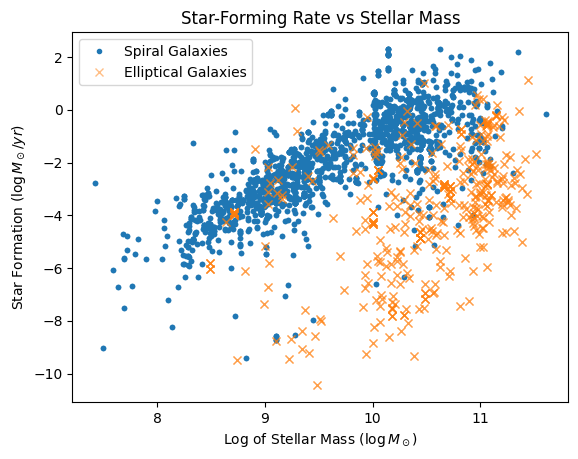

In [10]:
# 1) a)
mask_elliptical = data['type'] < 1
mask_spiral = (data['type'] <= 3) & (data['type'] >= 2)

plt.plot(
    data[mask_spiral]['mstar'],
    np.log(data[mask_spiral]['sfr_re']),
    '.',
    label='Spiral Galaxies'
)

plt.plot(
    data[mask_elliptical]['mstar'],
    np.log(data[mask_elliptical]['sfr_re']),
    'x',
    alpha=0.5,
    label='Elliptical Galaxies'
)

plt.legend()
plt.title(r'Star-Forming Rate vs Stellar Mass')
plt.xlabel('Log of Stellar Mass ($\log M_\odot$)')
plt.ylabel(r'Star Formation ($\log M_\odot / yr$)')

Line has equation y = (1.78 +- 0.03) * x + (-19.09 +- 0.24)
Result has R-value of 0.77 and p-value of 0.00e+00


<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
/var/folders/nb/byfjq48d6jz8b3g74s3zr7rh0000gp/T/ipykernel_56337/1392519393.py:27: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Log of Stellar Mass ($\log M_\odot$)')


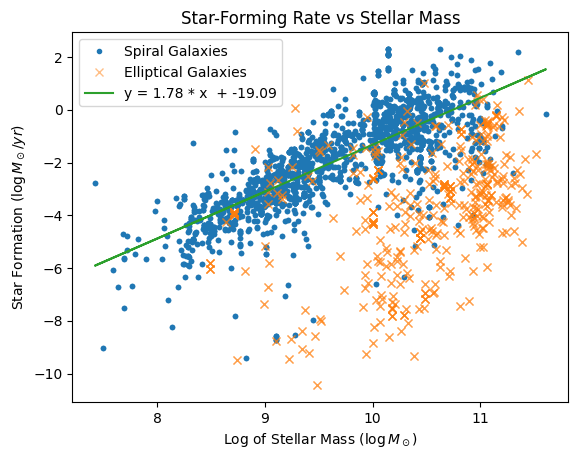

In [11]:
# 1) b) 
plt.plot(
    data[mask_spiral]['mstar'],
    np.log(data[mask_spiral]['sfr_re']),
    '.',
    label='Spiral Galaxies'
)

result = stats.linregress(data[mask_spiral]['mstar'], np.log(data[mask_spiral]['sfr_re']))

plt.plot(
    data[mask_elliptical]['mstar'],
    np.log(data[mask_elliptical]['sfr_re']),
    'x',
    alpha=0.5,
    label='Elliptical Galaxies'
)


# Adding LOB to graph
plt.plot(
    data[mask_spiral]['mstar'], result.slope * data[mask_spiral]['mstar'] + result.intercept,
    label=f'y = {result.slope:.2f} * x  + {result.intercept:.2f}'
)
plt.legend()
plt.title(r'Star-Forming Rate vs Stellar Mass')
plt.xlabel('Log of Stellar Mass ($\log M_\odot$)')
plt.ylabel(r'Star Formation ($\log M_\odot / yr$)')

print(f'Line has equation y = ({result.slope:.2f} +- {result.stderr:.2f}) * x + ({result.intercept:.2f} +- {result.intercept_stderr:.2f})')
print(f'Result has R-value of {result.rvalue:.2f} and p-value of {result.pvalue:.2e}')

## 2) Spectra 
#### a) Compute the red-shift of this particular galaxy given that the Balmer Alpha line is 6562.8 Angstrom in the rest frame. Identify any other relevant peaks. 
#### b) Transforming your graph in 2)a) from a redshifted wavelength scale to the rest frame wavelength scale.

Recall that:
$$
    z = \frac{\Delta \lambda}{\lambda_0}
$$

where $\lambda_0$ is rest frame wavelength and $\Delta \lambda = \lambda - \lambda_0$

Note for the data:
- Wavelength is in $Angstrom$
- Flux is in $10^{-20} Angstrom^-1 cm^-2 erg s^{-1}$

This link may be useful for identifying spectra [Galaxy Spectra](http://astronomy.nmsu.edu/nicole/teaching/ASTR505/lectures/lecture26/slide01.html)

In [12]:
mysterious_galaxy = pd.read_csv('mysterious_galaxy.csv')
mysterious_galaxy['flux'] = np.where(mysterious_galaxy['flux'] == 0, np.nan, mysterious_galaxy['flux'])

In [13]:
peaks, _ = find_peaks(mysterious_galaxy['flux'], prominence=10000)
halpha_wavelength = mysterious_galaxy['wavelength'][peaks].iloc[0]
halpha_flux = mysterious_galaxy['flux'][peaks].iloc[0]

<>:16: SyntaxWarning: invalid escape sequence '\A'
<>:16: SyntaxWarning: invalid escape sequence '\A'
/var/folders/nb/byfjq48d6jz8b3g74s3zr7rh0000gp/T/ipykernel_56337/1173727464.py:16: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength ($\AA$)')


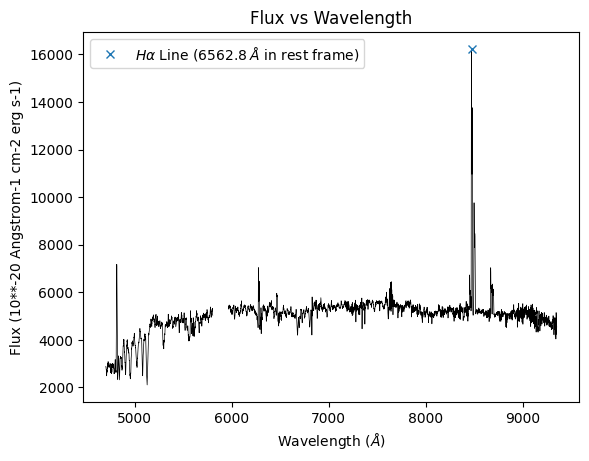

In [14]:
plt.plot(
    mysterious_galaxy['wavelength'],
    mysterious_galaxy['flux'],
    'k-',
    linewidth='0.5'
)

plt.plot(
    halpha_wavelength,
    halpha_flux,
    'x',
    label=r'$H\alpha$ Line ($6562.8 \; \AA$ in rest frame)'
)

plt.title('Flux vs Wavelength')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (10**-20 Angstrom-1 cm-2 erg s-1)')
plt.legend()

<>:34: SyntaxWarning: invalid escape sequence '\A'
<>:34: SyntaxWarning: invalid escape sequence '\A'
/var/folders/nb/byfjq48d6jz8b3g74s3zr7rh0000gp/T/ipykernel_56337/236061584.py:34: SyntaxWarning: invalid escape sequence '\A'
  ax.set_xlabel('Wavelength ($\AA$)')


Text(0, 0.5, 'Flux (10**-20 Angstrom-1 cm-2 erg s-1)')

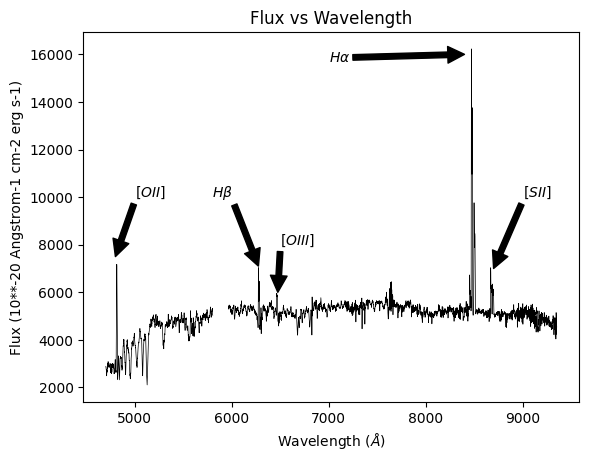

In [15]:
fig, ax = plt.subplots()

ax.plot(
    mysterious_galaxy['wavelength'],
    mysterious_galaxy['flux'],
    'k-',
    linewidth='0.5'
)

ax.annotate(r'$[SII]$', xy=(8700, 7000), xytext=(9000, 10000),
            arrowprops=dict(facecolor='black'),
            )

ax.annotate(r'$H\alpha$', xy=(8400, 16000), xytext=(7000, 15700),
            arrowprops=dict(facecolor='black'),
            )

ax.annotate(r'$H\beta$', xy=(6275, 7100), xytext=(5800, 10000),
            arrowprops=dict(facecolor='black', shrink=50),
            )

ax.annotate(r'$[OIII]$', xy=(6475, 6000), xytext=(6500, 8000),
            arrowprops=dict(facecolor='black', shrink=50),
            )

ax.annotate(r'$[OII]$', xy=(4800, 7500), xytext=(5000, 10000),
            arrowprops=dict(facecolor='black', shrink=50),
            )




ax.set_title('Flux vs Wavelength')
ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Flux (10**-20 Angstrom-1 cm-2 erg s-1)')

In [16]:
# 2) a)
halpha_rest = 6562.8 # Angstrom
z = (halpha_wavelength - halpha_rest) / halpha_rest
print(f'Red Shift is {z:.2f}')

Red Shift is 0.29


<>:17: SyntaxWarning: invalid escape sequence '\A'
<>:17: SyntaxWarning: invalid escape sequence '\A'
/var/folders/nb/byfjq48d6jz8b3g74s3zr7rh0000gp/T/ipykernel_56337/1356016676.py:17: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength ($\AA$)')


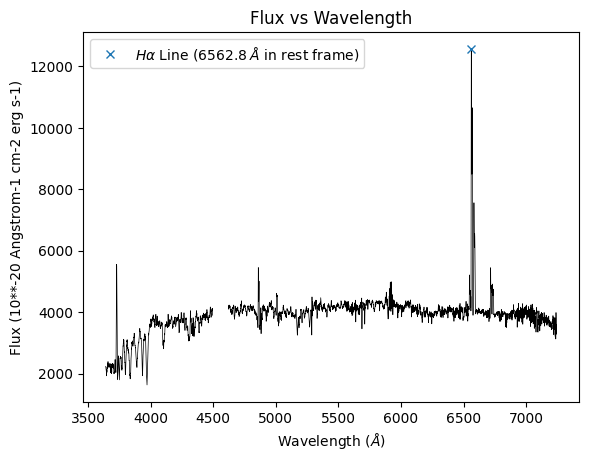

In [ ]:
# 2) b)
plt.plot(
    mysterious_galaxy['wavelength'] / (1 + z),
    mysterious_galaxy['flux'],
    'k-',
    linewidth='0.5'
)

plt.plot(
    halpha_wavelength / (1 + z),
    halpha_flux,
    'x',
    label=r'$H\alpha$ Line ($6562.8 \; \AA$ in rest frame)'
)

plt.title('Flux vs Wavelength')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (10**-20 Angstrom-1 cm-2 erg s-1)')
plt.legend()

Tutor Notes:
Spectra is a modified version of `MAGPI1202197197_1dspec_1.0re.fits`

Sources:
- [Significance of bar quenching in the global quenching of star formation](https://www.aanda.org/articles/aa/pdf/2019/08/aa35207-19.pdf)
- [Galaxy and Mass Assembly (GAMA): the star formation rate dependence of the stellar initial mass function](https://academic.oup.com/mnras/article/415/2/1647/1042513)
- [The Galaxy Main Sequence: What’s in the Scatter?](https://astrobites.org/2021/01/30/galaxy-ms-scatter/)